In [158]:
#Import all the necessary python libraries
import pandas as pd
import requests as req
import re
from bs4 import BeautifulSoup as bs
import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
#Function to check if a Country can be allocated to Europe

def is_europe (Country):
    europe = ['Germany','Italy','United Kingdom','Spain','France','Netherlands','Belgium','Poland','Greece','Austria','Czech Republic','Hungary','Sweden','Romania','Denmark','Bulgaria','Portugal','Slovakia','Finland','Slovenia','Cyprus','Luxembourg','Malta','Lithuania','Estonia','Ireland','Latvia']
    if Country in europe:
        return 'True'
    else:
        return 'False'

In [160]:
#Import a table using Web scraping

wikiurl="https://en.wikipedia.org/wiki/Solar_power_by_country"
table_class="wikitable sortable jquery-tablesorter"
wiki=req.get(wikiurl)

In [161]:
#Import a table from a local CSV file

sunshine = pd.read_csv('OneDrive - Work/Documents/Hendry/UCD/Project/sunshine hours by city.csv')
sunshine_data_import = pd.DataFrame(sunshine)

#Add a column for checking iof a country is in Europe
sunshine_data_clean = sunshine_data_import.rename(columns={'City':'Is_Europe'})

#Initiate while loop to scan through rows for function is_europe
x = 0
rowcount = len(sunshine_data_clean.index) 
while x < rowcount:
    Value = sunshine_data_clean.iloc[x,0]
    Test = is_europe(Value)
    City_String = sunshine_data_clean.iloc[x,1]
    sunshine_data_clean['Is_Europe'] = sunshine_data_clean['Is_Europe'].replace([City_String],[Test])
    x +=1

#Group entries in which the country is the same, take the value with the maximum value
sunshine_data_final = sunshine_data_clean.groupby('Country').max()

#Filter out all countries that are flagged as being in Europe
europe = sunshine_data_final[(sunshine_data_final["Is_Europe"] == 'True')]

#Add a row to calculate the World Total for each column
world_total = pd.Series(data={'Is_Europe':'False','Jan':sunshine_data_final['Jan'].sum(),'Feb':sunshine_data_final['Feb'].sum(),'Mar':sunshine_data_final['Mar'].sum(), 'Apr':sunshine_data_final['Apr'].sum(), 'May':sunshine_data_final['May'].sum(), 'Jun':sunshine_data_final['Jun'].sum(), 'Jul':sunshine_data_final['Jul'].sum(), 'Aug':sunshine_data_final['Aug'].sum(), 'Sep':sunshine_data_final['Sep'].sum(), 'Oct':sunshine_data_final['Oct'].sum(), 'Nov':sunshine_data_final['Nov'].sum(), 'Dec':sunshine_data_final['Dec'].sum(),'Year':sunshine_data_final['Year'].sum()}, name = 'World total')

#Add a row to calculate the Total for europe
european_union = pd.Series(data={'Is_Europe':'False','Jan':europe['Jan'].mean(),'Feb':europe['Feb'].mean(),'Mar':europe['Mar'].mean(), 'Apr':europe['Apr'].mean(), 'May':europe['May'].mean(), 'Jun':europe['Jun'].mean(), 'Jul':europe['Jul'].mean(), 'Aug':europe['Aug'].mean(),'Sep':europe['Sep'].mean(), 'Oct':europe['Oct'].mean(), 'Nov':europe['Nov'].mean(), 'Dec':europe['Dec'].mean(),'Year':europe['Year'].mean()}, name = 'European Union')

#Add rows to dataframe
sunshine_data_add_europe = sunshine_data_final.append(european_union,ignore_index=False)
sunshine_data_add_world = sunshine_data_add_europe.append(world_total,ignore_index=False)

#Hide the flag column for Is_Europe
sunshine_data = sunshine_data_add_world.drop("Is_Europe",axis=1, inplace=False)
sunshine_data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
Country,,,,,,,,,,,,,
Afghanistan,177.200000,178.600000,204.500000,232.500000,310.30000,353.400000,356.80000,339.700000,303.900000,282.600000,253.200000,182.400000,3175.100000
Albania,124.000000,125.000000,165.000000,191.000000,263.00000,298.000000,354.00000,327.000000,264.000000,218.000000,127.000000,88.000000,2544.000000
Algeria,297.600000,275.500000,322.400000,327.000000,328.60000,318.000000,356.50000,331.700000,288.000000,310.000000,285.000000,272.800000,3686.000000
Angola,219.000000,208.000000,213.000000,199.000000,233.00000,223.000000,175.00000,150.000000,145.000000,164.000000,199.000000,212.000000,2341.000000
Argentina,297.600000,257.600000,235.600000,220.000000,195.30000,168.000000,182.90000,229.400000,225.000000,282.100000,294.000000,285.200000,2871.700000
Armenia,93.000000,108.000000,162.000000,177.000000,242.00000,297.000000,343.00000,332.000000,278.000000,212.000000,138.000000,92.000000,2474.000000
Australia,356.500000,314.900000,300.700000,285.000000,297.60000,297.000000,313.10000,319.300000,300.000000,313.100000,320.400000,359.400000,3499.100000
Austria,66.000000,106.000000,128.000000,183.000000,239.00000,228.000000,260.00000,251.000000,168.000000,139.000000,66.000000,51.000000,1884.000000
Azerbaijan,89.900000,89.000000,124.000000,195.000000,257.30000,294.000000,313.10000,282.100000,222.000000,145.700000,93.000000,102.300000,2207.400000


In [162]:
#Format the table obtained from Web Scraping
solar = bs(wiki.content, 'lxml')
table = solar.find('table', {'class':"wikitable"})
solar_data_import=pd.read_html(str(table))
solar_data_import=pd.DataFrame(solar_data_import[0])

#Remove the last row from the table obtained
solar_data_clean_row = solar_data_import.drop([82], axis=0)

#Rename columns to clean up data
solar_data_clean_column = solar_data_clean_row.rename(columns={"Unnamed: 0_level_0": "Country","2016[7]": "2016","2017[15]": "2017","2018[16][17]": "2018","2019[18][19]": "2019","2020[20][21]": "2020","Country or territory": "","Total":""})

#Remove unnceccesary data columns
solar_data_final = solar_data_clean_column.drop(["W per capita 2019", "Share of totalconsumption1","New"], axis=1, level=1)

#Initiate while loop to remove all text between [] brackets in Country names
y=0
rows = len(solar_data_final.index)

while y<rows:
    string=solar_data_final.iloc[y,0]
    string_clean=re.sub("\[.*?\]","",string)
    solar_data_final['Country'] = solar_data_final['Country'].replace([string],[string_clean])
    y +=1

#Set the index and columns
solar_data = pd.DataFrame(solar_data_final).set_index('Country')
solar_data.columns = ['2016','2017','2018','2019','2020']

#Convert datatypes as float
solar_data = solar_data.astype('float')
solar_data

,2016,2017,2018,2019,2020
Country,,,,,
China,78070.0,131000.0,175018.0,204700.0,254355.0
European Union,101433.0,107150.0,115234.0,134129.0,152917.0
United States,40300.0,51000.0,53184.0,60682.0,75572.0
Japan,42750.0,49000.0,55500.0,63000.0,67000.0
Germany,41220.0,42000.0,45930.0,49200.0,53783.0
India,9010.0,18300.0,26869.0,35089.0,39211.0
Italy,19279.0,19700.0,20120.0,20800.0,21600.0
Australia,5900.0,7200.0,11300.0,15928.0,17627.0
Vietnam,6.0,9.0,106.0,5695.0,16504.0


In [163]:
#Join the two tables using inner join funtion
solar_sunshine_full = solar_data.join(sunshine_data)

#Remove all rows with NAn data
solar_sunshine = solar_sunshine_full.dropna()
print(solar_sunshine)

                    2016      2017      2018      2019      2020  \
Country                                                            
China            78070.0  131000.0  175018.0  204700.0  254355.0   
European Union  101433.0  107150.0  115234.0  134129.0  152917.0   
United States    40300.0   51000.0   53184.0   60682.0   75572.0   
Japan            42750.0   49000.0   55500.0   63000.0   67000.0   
Germany          41220.0   42000.0   45930.0   49200.0   53783.0   
India             9010.0   18300.0   26869.0   35089.0   39211.0   
Italy            19279.0   19700.0   20120.0   20800.0   21600.0   
Australia         5900.0    7200.0   11300.0   15928.0   17627.0   
Vietnam              6.0       9.0     106.0    5695.0   16504.0   
South Korea       4350.0    5600.0    7862.0   11200.0   14575.0   
Spain             4669.0    4688.0    4707.0    8711.0   14089.0   
United Kingdom   11630.0   12700.0   13108.0   13346.0   13563.0   
France            7130.0    8000.0    9483.0    

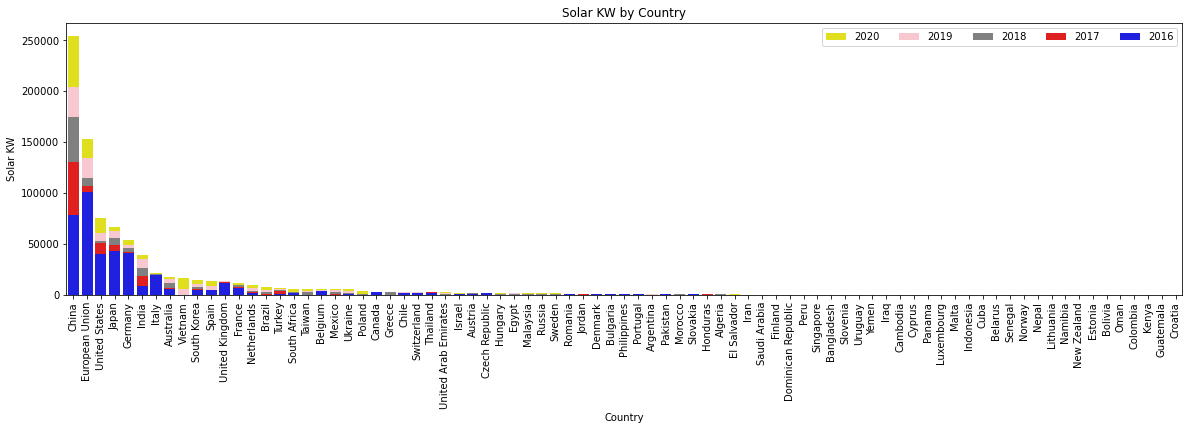

In [164]:
#Reset index for plotting chart
solar_data.reset_index(inplace=True)

#Set chart size
size = (20, 5)
fig, ax = plt.subplots(figsize=size)

#Plot 5 x stacked bar charts for each year
fig=sns.barplot(data=solar_data[:81], x="Country", y="2020",ax=ax, label="2020", color='yellow')
fig=sns.barplot(data=solar_data[:81], x="Country", y="2019",ax=ax, label="2019",color='pink')
fig=sns.barplot(data=solar_data[:81], x="Country", y="2018",ax=ax, label="2018",color='grey')
fig=sns.barplot(data=solar_data[:81], x="Country", y="2017",ax=ax, label="2017",color='red')
fig=sns.barplot(data=solar_data[:81], x="Country", y="2016",ax=ax, label="2016",color='blue')

#Set axis labels
fig.set(xlabel='Country', ylabel='Solar KW')

#Rotate x-axis labels
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)

#Assign table Title
plt.title('Solar KW by Country');

#Display legend
plt.legend(ncol=5, loc="upper right", frameon=True)
plt.show()

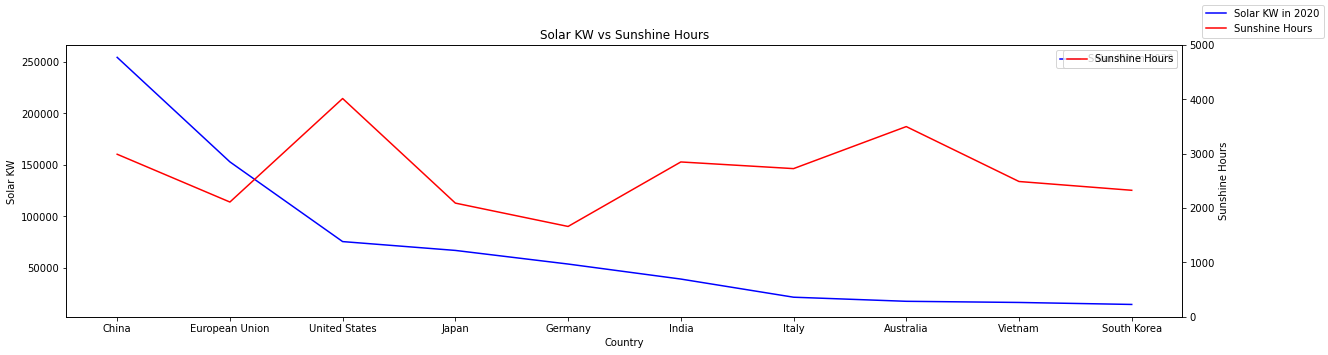

In [172]:
#Set chart size
size = (20, 5)
fig, ax = plt.subplots(figsize=size)

#Add 2nd y-axis
ax2 = ax.twinx()

#Plot 2 x line charts on the same image
fig=sns.lineplot(data=solar_sunshine[:10], x="Country", y="2020",ax=ax, label="Solar KW in 2020", color='blue')
fig=sns.lineplot(data=solar_sunshine[:10], x="Country", y="Year",ax=ax2, label="Sunshine Hours", color='red')

#Set label for x-axis
fig.set(xlabel='Country')

#Set chart title
plt.title('Solar KW vs Sunshine Hours');

#Assign limit to 2nd y-axis to increase scaling
plt.ylim(0,5000)

#Display legend
ax.figure.legend()

#Set labels for X and Y axis
ax.set_ylabel('Solar KW')
ax2.set_ylabel('Sunshine Hours')
plt.show()